In [3]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [4]:
!pip install prophet awswrangler

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 33.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 1.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.6/184.6 kB 3.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.9 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:00:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730984 sha256=cec59523ab7c47cda0dcc5ab47cb97527732c587c1618a035eddd9def859493d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/a0/8b/b2/810ae5a6f970c8be4725353400d643c90de1c0f023a9884ee7
Successfully built pymeeus


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import awswrangler as wr
path = f"s3://source-voltar/source/fed.csv"
df=wr.s3.read_csv(path)
df.head()

,date,value
0,2022-07-01,0.20
1,2022-06-01,0.24
2,2022-05-01,0.32
3,2022-04-01,0.18
4,2022-03-01,0.20


In [7]:
df.describe()

,value
count,120.000000
mean,2.140833
std,12.799137
min,0.100000
25%,0.240000
50%,0.350000
75%,0.580000
max,100.000000


In [8]:
# Select only the important features i.e. the date and price
data = df[["date","value"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = df.rename(columns = {"date":"ds","value":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2022-07-01,0.20
1,2022-06-01,0.24
2,2022-05-01,0.32
3,2022-04-01,0.18
4,2022-03-01,0.20


In [9]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

05:46:38 - cmdstanpy - INFO - Chain [1] start processing
05:46:39 - cmdstanpy - INFO - Chain [1] done processing


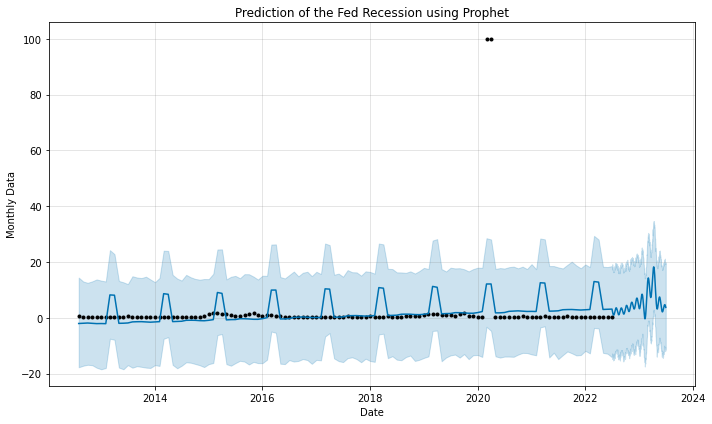

In [10]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Prediction of the Fed Recession using Prophet")
plt.xlabel("Date")
plt.ylabel("Monthly Data")
plt.tight_layout()
plt.savefig('plots/Prediction-Fed-Recession-Prophet-Plot.jpg',bbox_inches='tight')
plt.show()

In [11]:
print('hi my name is cassandra')


hi my name is cassandra
